# **Laboratorijska vježba 2**: Zadaci za samostalni rad

## **Podaci o poznatim filmovima i njihovoj zaradi**

U ovoj laboratorijskoj vježbi istražit ćemo skup podataka o popularnim filmovima (blockbusterima) te njihov financijski učinak. Skup podataka dostupan je u *Data/blockbusters.csv*. 

U nastavku je dan sažetak stupaca (značajki) u skupu podataka:

*   Main_Genre - primarni žanr filma
*   Genre_2 
*   Genre_3
*   imdb_rating
*   length - duljina filma u minutama
*   rank_in_year - rank u top 10 filmova objavljenih te godine
*   rating - ocjena publike
*   studio - studio koji je producirao film
*   title - naslov filma
*   worldwide_gross - ukupni prihod filma u svijetu u dolarima
*   year - godina objavljivanja

In [ ]:
!head Data/blockbusters.csv

Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year
Action,Adventure,Drama,7.4,135,1,PG-13,Walt Disney Pictures,Black Panther,"$700,059,566",2018
Action,Adventure,Sci-Fi,8.5,156,2,PG-13,Walt Disney Pictures,Avengers: Infinity War,"$678,815,482",2018
Animation,Action,Adventure,7.8,118,3,PG,Pixar,Incredibles 2,"$608,581,744",2018
Action,Adventure,Drama,6.2,129,4,PG-13,Universal Pictures,Jurassic World: Fallen Kingdom,"$416,769,345",2018
Action,Comedy,,7.8,119,5,R,20th Century Fox,Deadpool 2,"$318,491,426",2018
Action,Adventure,Drama,7.9,147,6,PG-13,Paramount Pictures,Mission: Impossible - Fallout,"$220,159,104",2018
Action,Comedy,,7.2,118,7,PG-13,Walt Disney Pictures,Ant-Man and the Wasp,"$216,648,740",2018
Action,Adventure,Drama,7,135,8,PG-13,Walt Disney Pictures,Solo: A Star Wars Story,"$213,767,512",2018
Action,Adventure,Drama,6.9,112,9,PG-13,Columbia Pictures,Venom,"$213,030,843",2018


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

data_folder = './Data/'

movies = pd.read_csv(data_folder + 'blockbusters.csv')
movies.head(10)



Main_Genre    Genre_2    Genre_3  imdb_rating  length  rank_in_year rating  \
0     Action  Adventure      Drama          7.4     135             1  PG-13   
1     Action  Adventure     Sci-Fi          8.5     156             2  PG-13   
2  Animation     Action  Adventure          7.8     118             3     PG   
3     Action  Adventure      Drama          6.2     129             4  PG-13   
4     Action     Comedy        NaN          7.8     119             5      R   
5     Action  Adventure      Drama          7.9     147             6  PG-13   
6     Action     Comedy        NaN          7.2     118             7  PG-13   
7     Action  Adventure      Drama          7.0     135             8  PG-13   
8     Action  Adventure      Drama          6.9     112             9  PG-13   
9      Music      Drama        NaN          8.1     135            10      R   

                 studio                           title worldwide_gross  year  
0  Walt Disney Pictures                   Black Panther    $700,059,566  2018  
1  Walt Disney Pictures          Avengers: Infinity War    $678,815,482  2018  
2                 Pixar                   Incredibles 2    $608,581,744  2018  
3    Universal Pictures  Jurassic World: Fallen Kingdom    $416,769,345  2018  
4      20th Century Fox                      Deadpool 2    $318,491,426  2018  
5    Paramount Pictures   Mission: Impossible - Fallout    $220,159,104  2018  
6  Walt Disney Pictures            Ant-Man and the Wasp    $216,648,740  2018  
7  Walt Disney Pictures         Solo: A Star Wars Story    $213,767,512  2018  
8     Columbia Pictures                           Venom    $213,030,843  2018  
9           Warner Bros                 A Star is Born     $199,721,727  2018

## **Zadatak 1: Vizualizacija jedne varijable**

Koristeći naučeno znanje, Vaš je zadatak vizualizirati jednu varijablu koristeći biblioteku Matplotlib. Usredotočite se na stupac 'worldwide_gross' te istražite njegovu distribuciju pomoću histograma i dijagrama pravokutnika. Svaki dijagram mora imati prikladno označene osi i naslov (koristite metode *plt.xlabel()*, *plt.ylabel()* i *plt.title()*). 

In [ ]:
movies["worldwide_gross"]=movies["worldwide_gross"].str.replace('$','')
movies["worldwide_gross"]=movies["worldwide_gross"].str.replace(',','')

<ipython-input-3-8bf6f241c465>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movies["worldwide_gross"]=movies["worldwide_gross"].str.replace('$','')


In [ ]:
movies["worldwide_gross"]=movies["worldwide_gross"].astype(float)

Histogram 

Text(0.5, 1.0, 'Distribution of worldwide_gross')

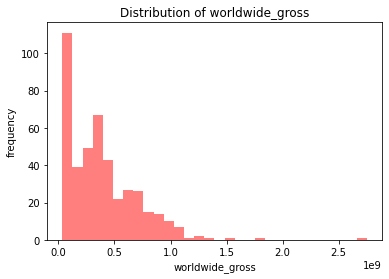

In [ ]:
plt.hist(movies["worldwide_gross"],bins=30, alpha=0.5, color='r', histtype='bar')
plt.xlabel('worldwide_gross')
plt.ylabel('frequency')
plt.title('Distribution of worldwide_gross')

Dijagram pravokutnika

Text(0.5, 1.0, 'Distribution of worldwide_gross')

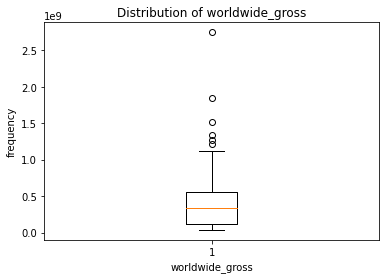

In [ ]:
plt.boxplot(movies["worldwide_gross"])
plt.xlabel('worldwide_gross')
plt.ylabel('frequency')
plt.title('Distribution of worldwide_gross')

## **Zadatak 2: Vizualizacija dviju kontinuiranih varijabli**

Provjerite ispravnost tvrdnje da blockbusteri s većim IMDB rejtingom ujedno ostvaruju i više prihoda. To možete postići vizualizacijom odnosa između dviju varijabli koje sadrže ove informacije, pri čemu je za vizualizaciju prikladno koristiti dijagram raspršenosti.

Dijagram raspršenosti

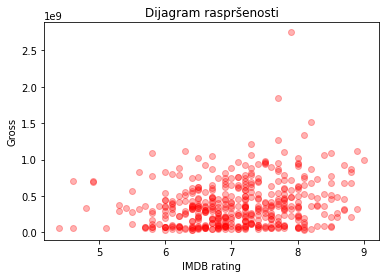

In [ ]:
x= movies["imdb_rating"]
y= movies["worldwide_gross"]
plt.xlabel("IMDB rating")
plt.ylabel("Gross")
plt.title("Dijagram raspršenosti")
plt.scatter(x, y, c='r', alpha=0.3, cmap='viridis')

Na dijagram dodajte tzv. "*best-fit*" pravac koji se koristi za izražavanje odnosa različitih podatkovnih točaka u dijagramu raspršenosti. Ovaj pravac predstavlja pravac koji je najmanje udaljen od svih točaka na grafu. 

<AxesSubplot:xlabel='imdb_rating', ylabel='worldwide_gross'>

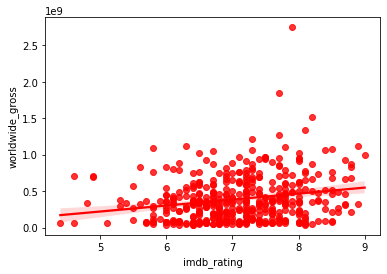

In [ ]:
sns.regplot(x=movies['imdb_rating'],y=movies['worldwide_gross'], color="r") 

Uz vizualizaciju, odnos dviju kontinuiranih varijabli možete numerički iskazati izračunavanjem korelacije. Pomoću biblioteke Pandas izračunajte korelaciju između ovih varijabli te ju ispravno protumačite.

In [ ]:
correlation=x.corr(y)
correlation

0.21325728109060602

Uz odnos ovih dviju varijabli, bilo bi zanimljivo prikazati i razlike u njihovim distribucijama. Ove razlike možete vizualizirati zajedničkim dijagramom (jointplot iz biblioteke Seaborn) koji ujedno prikazuje njihov dijagram raspršenosti te distribucije pomoću stupčastih dijagrama. Prokomentirajte razliku u distribucijama ovih dviju varijabli.

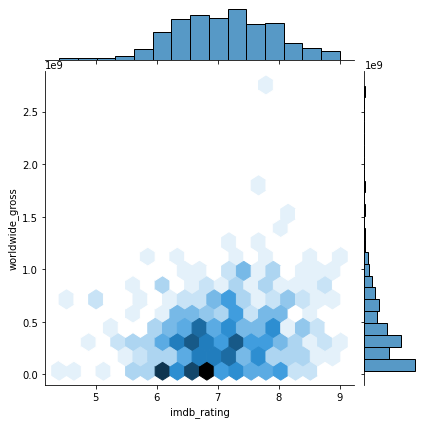

In [ ]:
sns.jointplot(x='imdb_rating', y='worldwide_gross', data=movies, kind="hex")

## **Zadatak 3: Vizualizacija odnosa kontinuirane i kategoričke varijable**

Razmotrite pet najzastupljenijih žanrova te ispitajte njihove prihode. Vizualizirajte odnos između ovih varijabli koristeći stupčasti dijagram, dijagram pravokutnika te violinske dijagrame. 

In [ ]:
top5=movies["Main_Genre"].value_counts().head(5)
print(top5)
top5_movies=movies[(movies["Main_Genre"].isin(top5.keys()))]
top5_movies

Thriller    63
Comedy      55
Fantasy     54
Sci-Fi      50
Romance     48
Name: Main_Genre, dtype: int64


Main_Genre    Genre_2 Genre_3  imdb_rating  length  rank_in_year rating  \
37      Sci-Fi    Fantasy     NaN          8.0     164             8  PG-13   
38     Romance    Fantasy     NaN          6.9     105             9     PG   
40      Sci-Fi  Adventure  Action          5.8     165             1  PG-13   
41     Fantasy  Adventure     NaN          7.5     144             2  PG-13   
42      Sci-Fi  Adventure  Action          8.1     121             3  PG-13   
..         ...        ...     ...          ...     ...           ...    ...   
423   Thriller      Drama     NaN          8.0     138             4      R   
424   Thriller     Horror   Drama          7.6     111             5      R   
428   Thriller      Crime  Action          6.8      96             9      R   
431    Romance      Drama     NaN          6.3     109             5      R   
432   Thriller      Crime  Comedy          7.1     113             6      G   

                   studio                                      title  \
37       20th Century Fox                                The Martian   
38   Walt Disney Pictures                                 Cinderella   
40     Paramount Pictures            Transformers: Age of Extinction   
41            Warner Bros  The Hobbit: The Battle of the Five Armies   
42   Walt Disney Pictures                    Guardians of the Galaxy   
..                    ...                                        ...   
423           Warner Bros                    All the President's Men   
424      20th Century Fox                                   The Omen   
428           Warner Bros                               The Enforcer   
431     Columbia Pictures                                    Shampoo   
432   Metro-Goldwyn-Mayer             The Return of the Pink Panther   

     worldwide_gross  year  
37      2.284337e+08  2015  
38      2.011514e+08  2015  
40      1.091404e+09  2014  
41      9.551138e+08  2014  
42      7.741766e+08  2014  
..               ...   ...  
423     7.060000e+07  1976  
424     6.092298e+07  1976  
428     4.623600e+07  1976  
431     4.940773e+07  1975  
432     4.183335e+07  1975  

[270 rows x 11 columns]

Stupčasti dijagram

<AxesSubplot:xlabel='Main_Genre', ylabel='worldwide_gross'>

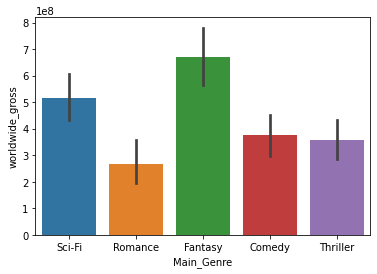

In [ ]:
sns.barplot(x= "Main_Genre", y="worldwide_gross", data=top5_movies)

Dijagram pravokutnika

<AxesSubplot:xlabel='Main_Genre', ylabel='worldwide_gross'>

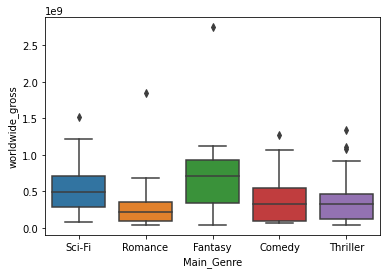

In [ ]:
sns.boxplot(x= "Main_Genre", y="worldwide_gross", data=top5_movies)

Violinski dijagram

<AxesSubplot:xlabel='Main_Genre', ylabel='worldwide_gross'>

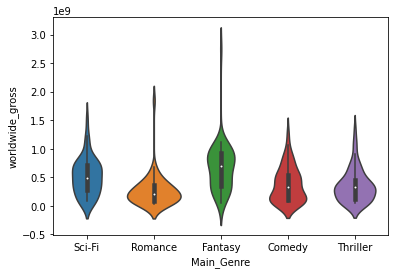

In [ ]:
sns.violinplot(x= "Main_Genre", y="worldwide_gross", data=top5_movies)

## **Zadatak 4: Vizualizacija neizvjesnosti**

Pokušajte odgovoriti na pitanje kako bi se kretao prosječni prihod od blockbustera? Vizualizirajte prosječni godišnji svjetski bruto prihod, zajedno sa standardnom devijacijom. Devijaciju možete vizualizirati pomoću vizualizacije grešaka, odnosno metoda *errorbar* i *fill_between* iz biblioteke Matplotlib. Pomoć: grupirajte retke DataFrame-a prema godini te primijenite prikladnu metodu agregacije nad stupcem od interesa.

Je li se prosječni prihod povećao ili smanjio tijekom vremena? Što opažate?

<ErrorbarContainer object of 3 artists>

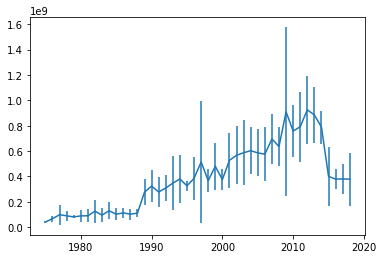

In [ ]:
godina = movies.groupby(movies.year).agg('mean')
dy = movies.groupby('year').worldwide_gross.std()
x = godina.index
y = godina.worldwide_gross
plt.errorbar(x, y, yerr=dy)

## **Zadatak 5: Stvaranje višestrukih dijagrama**

Nadalje, pokušajmo razumjeti koliko dugo blockbusteri traju u različitim žanrovima. Kad radite s velikim brojem kategorija (postoji 16 žanrova u skupu podataka), vizualizacije se lako zatrpaju i postaju nepregledne. Tada je korisno grupirati dijagrame u višestruke dijagrame. 

Napravite višestruki dijagram koji se sastoji od mreže od 4x4 dijagrama za 16 filmskih žanrova. U svakom poddijagramu prikažite histogram s distribucijom duljine filma za različite kategorije. Odgovorite na pitanje kojim žanrovima pripadaju najduži filmovi? Što možete reći o duljini komedija i animiranih filmova?

['Thriller', 'Comedy', 'Fantasy', 'Sci-Fi', 'Romance', 'Action', 'Drama', 'Animation', 'Crime', 'Family', 'Adventure', 'War', 'Music', 'Horror', 'Sport', 'History']


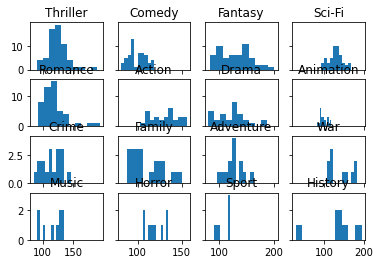

In [ ]:
genres = movies['Main_Genre'].value_counts()
genres = list(genres.keys())
print(genres)
fig, ax = plt.subplots(4, 4, sharex='col', sharey='row')
for i in range(4):
  for j in range(4):
    genre=genres[4*i+j]
    hist_genre=movies.query("Main_Genre==@genre")
    ax[i,j].hist(x=hist_genre.length)
    ax[i,j].set_title(genre)

## **Zadatak 6: Toplinske karte (Heatmaps)**

Zadnje što nas zanima jest koji filmski studiji izrađuju blockbustere za koji žanr. Postoji mnogo studija i mnogo žanrova. Pri radu s dvije varijable koje obje imaju mnogo različitih kategorija, često nema prostora za predstavljanje svake kombinacije dviju kategorija s posebnim dijagramom (kao što je stupčasti dijagram ili dijagram pravokutnika). U tom slučaju, postaje korisno predstaviti njihov odnos pomoću toplinske karte, gdje brojevi predstavljaju broj kombinacija koji se pojavljuje u skupu podataka. 

Vizualizirajte broj blockbustera koje je napravio svaki studio za svaki žanr. Pomoć: koristite metodu *heatmap()* iz biblioteke Seaborn.

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, 20th Century Fox to Warner Bros
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Action     16 non-null     int64
 1   Adventure  16 non-null     int64
 2   Animation  16 non-null     int64
 3   Comedy     16 non-null     int64
 4   Crime      16 non-null     int64
 5   Drama      16 non-null     int64
 6   Family     16 non-null     int64
 7   Fantasy    16 non-null     int64
 8   History    16 non-null     int64
 9   Horror     16 non-null     int64
 10  Music      16 non-null     int64
 11  Romance    16 non-null     int64
 12  Sci-Fi     16 non-null     int64
 13  Sport      16 non-null     int64
 14  Thriller   16 non-null     int64
 15  War        16 non-null     int64
dtypes: int64(16)
memory usage: 2.1+ KB
0      Walt Disney Pictures
1      Walt Disney Pictures
2                     Pixar
3        Universal Pictures
4          20th Century Fox
              

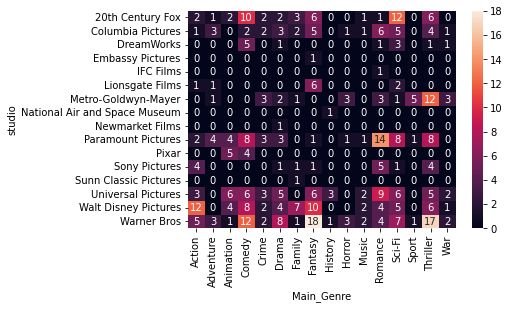

In [ ]:
from seaborn.matrix import heatmap

dataframe = pd.crosstab(movies["studio"], movies["Main_Genre"])
ax = heatmap(data=dataframe, annot=True)


Pomoću izrađene vizualizacije, pokušajte odgovoriti na sljedeća pitanja:

*   U koje žanrove spada većina filmova koje snima studio Warner Bros?
*   Koji je najuspješniji žanr filmskih filmova Walta Disneya?
*   Koji je studio napravio najveći broj ljubavnih blockbustera?

